In [116]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [177]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [141]:
# Converting string values into ints

In [179]:
# Converting hotel types from str to int

df.hotel = df.hotel.replace(['City Hotel', 'Resort Hotel'], [0, 1])

In [180]:
# Converting month from str to int

mo = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12}
df.arrival_date_month = df.arrival_date_month.map(mo)

In [181]:
# Creating a timeseries date and extraction of weekdays

df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [182]:
df['weekday'] = df['date'].dt.weekday

In [183]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [184]:
# Converting meal from str to int

meal = {'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4}
df.meal = df.meal.map(meal)

df.meal.unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [185]:
# Converting country from str to int

# First remove nan from list

land = df.country.unique()
check = [not pd.isnull(country) for country in land]
land = land[check]
land = np.sort(land)

land

array(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB',
       'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL',
       'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI',
       'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA',
       'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV',
       'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR',
       'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA',
       'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX',
       'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI',
       'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL',
       'NZL', 'OMN', 

In [186]:
# Now create a dictionary named "lan" to replace the country names with numbers

lan = {}
i = 0
for l in land:
    i += 1
    lan[l] = i

# Replacing:

df.country = df.country.map(lan)

df.country.unique()

array([136.,  60., 170.,  52.,  77.,  57.,  nan, 140., 125., 128.,   7.,
       134.,  44.,  16.,  30.,  35.,  67.,  82., 124.,  47., 141., 155.,
        12.,  53.,  43.,  26.,  55., 114.,  28., 101., 154.,   4.,  76.,
        32., 108., 104., 167., 149., 102., 135., 150.,  31.,  13.,  24.,
       100., 163., 175.,   2.,  81.,  41., 176.,  38., 177.,  49.,  92.,
        39.,  73.,   6., 162.,  83.,  72.,  70.,  78.,  61.,   5.,  64.,
       169.,  84.,  29.,  42.,  36.,  62.,  93., 122., 107., 172., 153.,
        56.,  87., 129.,  74.,  95., 132., 145., 156.,  14.,  21., 127.,
       159.,  48., 109., 118.,   8.,  86.,  99.,  40.,  34.,  23., 116.,
        37., 152., 166.,  20.,  33.,  85., 157., 146.,  15., 143., 174.,
       133., 139.,  51., 131., 111., 117.,  50., 106.,  80., 171., 126.,
        22., 103., 158., 164.,  45., 151.,  91.,  54.,  79.,  71., 142.,
        89., 105.,  19.,  75., 160., 123.,  17., 173., 165.,  59.,  63.,
       161.,  65.,  88.,  98.,  66., 113., 168., 11

In [187]:
# Second convert nan to 0 in country

df.country = df.country.fillna(0)

df.country = df.country.astype(int) # Converting from float to int

df.country.unique()

array([136,  60, 170,  52,  77,  57,   0, 140, 125, 128,   7, 134,  44,
        16,  30,  35,  67,  82, 124,  47, 141, 155,  12,  53,  43,  26,
        55, 114,  28, 101, 154,   4,  76,  32, 108, 104, 167, 149, 102,
       135, 150,  31,  13,  24, 100, 163, 175,   2,  81,  41, 176,  38,
       177,  49,  92,  39,  73,   6, 162,  83,  72,  70,  78,  61,   5,
        64, 169,  84,  29,  42,  36,  62,  93, 122, 107, 172, 153,  56,
        87, 129,  74,  95, 132, 145, 156,  14,  21, 127, 159,  48, 109,
       118,   8,  86,  99,  40,  34,  23, 116,  37, 152, 166,  20,  33,
        85, 157, 146,  15, 143, 174, 133, 139,  51, 131, 111, 117,  50,
       106,  80, 171, 126,  22, 103, 158, 164,  45, 151,  91,  54,  79,
        71, 142,  89, 105,  19,  75, 160, 123,  17, 173, 165,  59,  63,
       161,  65,  88,  98,  66, 113, 168, 119,  58, 112, 130,  18,  96,
       110, 120,  25, 137,  27,   1,   3, 148,  46, 138,  69,  97,  10,
        68,   9, 115, 121,  90, 144,  11, 147,  94])

In [188]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [189]:
# Converting market_segment from str to int

market_seg = df.market_segment.unique()

ms = {}
i = 0
for m in market_seg:
    i += 1
    ms[m] = i

# Replacing:

df.market_segment = df.market_segment.map(ms)

df.market_segment.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [196]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [200]:
# Converting distribution_channel from str to int

dc = {'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4}
df.distribution_channel = df.distribution_channel.map(dc)

df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [195]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'date', 'weekday'],
      dtype='object')

<AxesSubplot:>

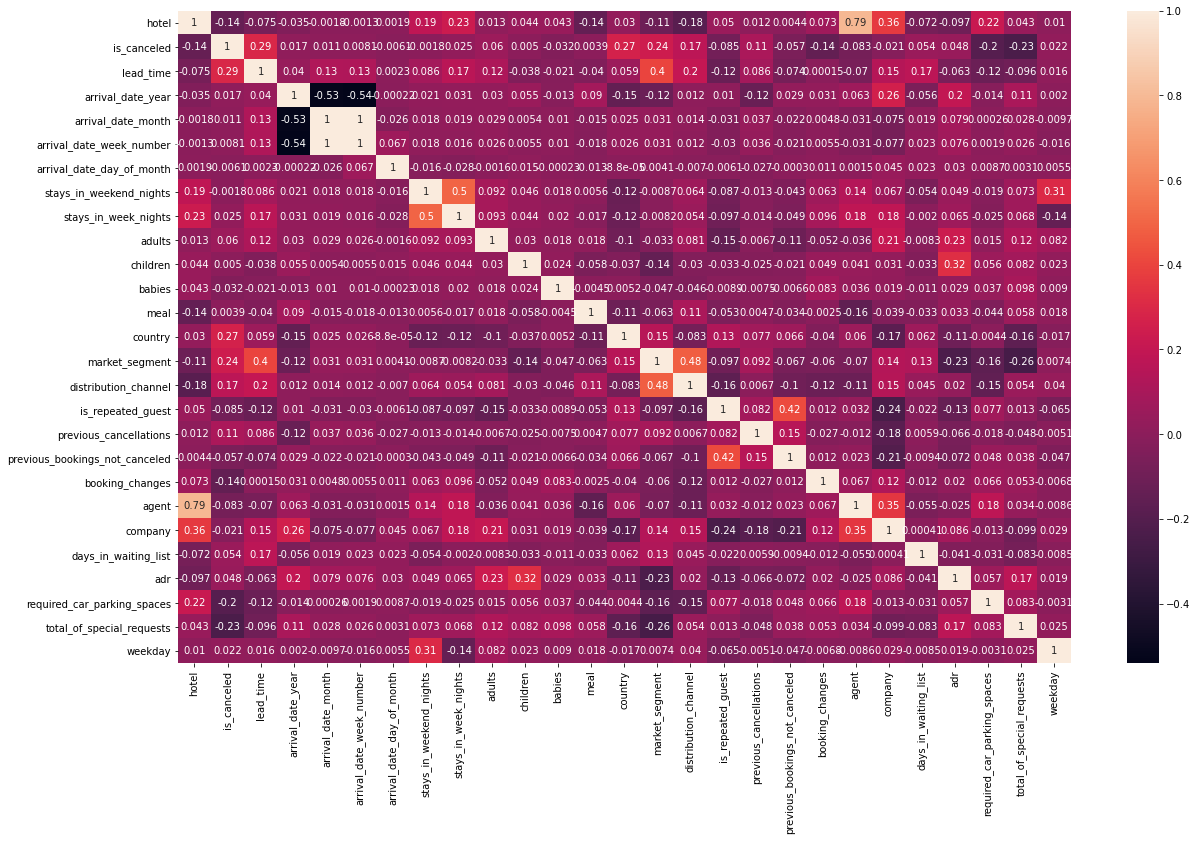

In [201]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [192]:
df_city_hotel = df[df.hotel == 0]
df_resort_hotel = df[df.hotel == 1]

<AxesSubplot:>

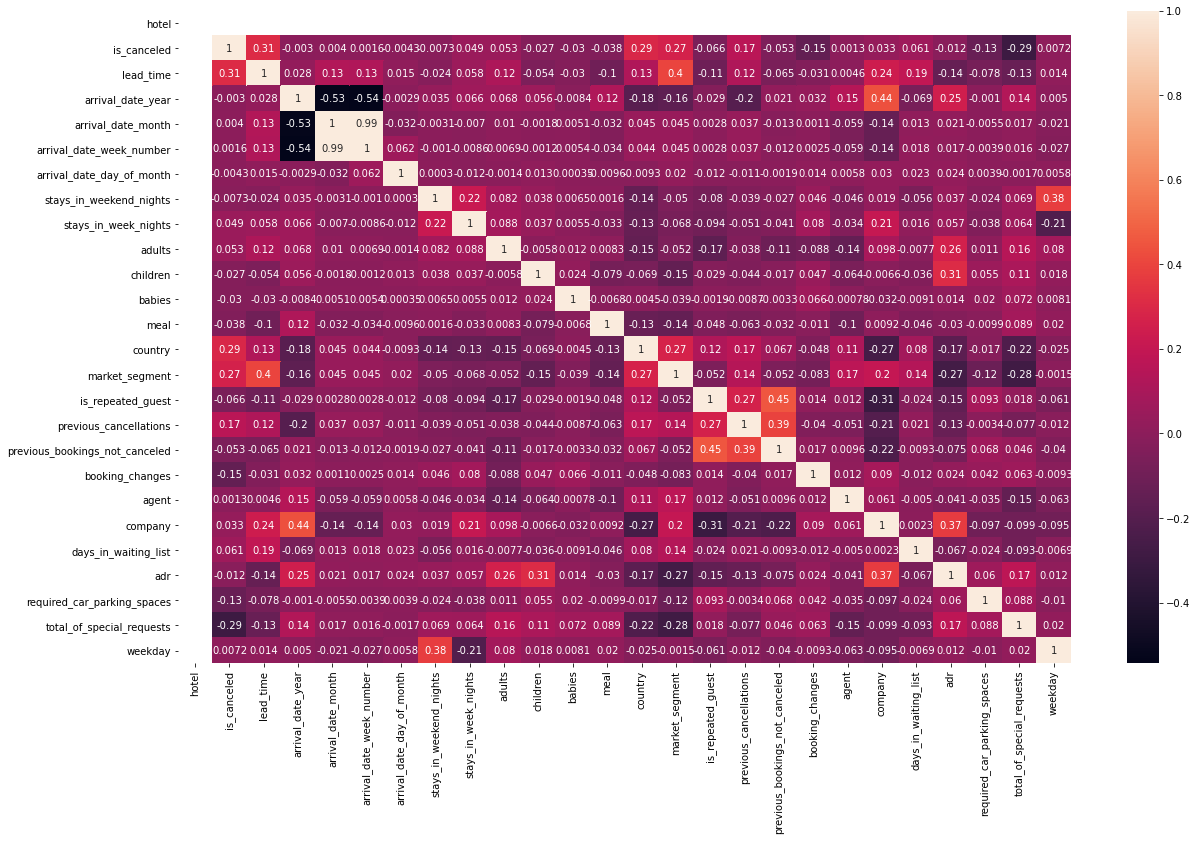

In [193]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_city_hotel.corr(), annot=True, ax = ax)

<AxesSubplot:>

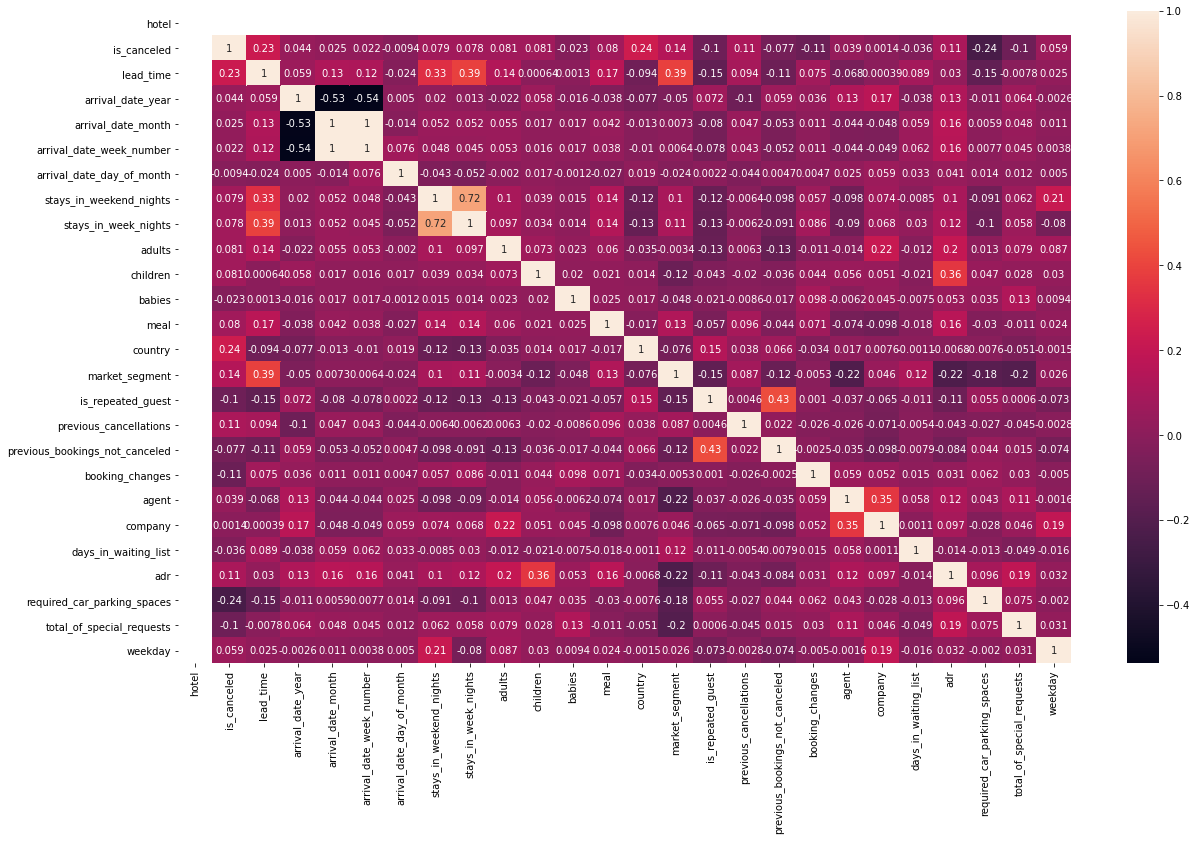

In [194]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_resort_hotel.corr(), annot=True, ax = ax)